In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [29]:
df = pd.read_csv('mobile_phone_pricing.csv')

In [30]:
df.head()


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [32]:

df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [33]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


<Axes: >

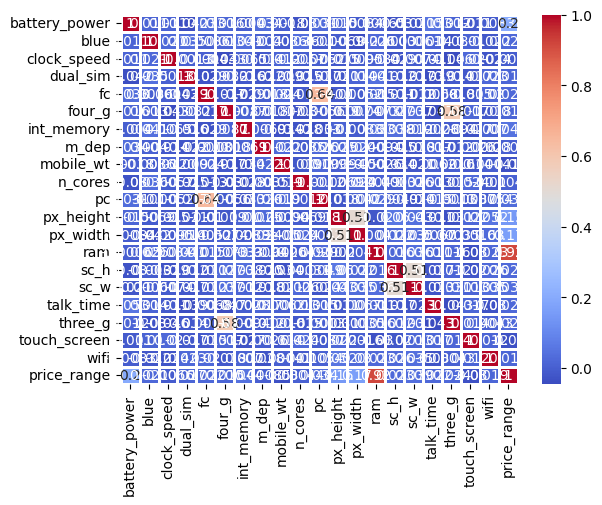

In [34]:
sns.heatmap(df.corr(),annot=True,  cmap = 'coolwarm',linewidth=1)

<Axes: xlabel='price_range', ylabel='count'>

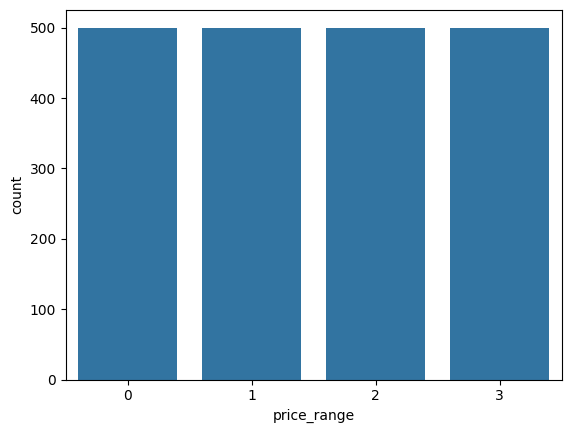

In [35]:
sns.countplot(x='price_range' , data=df , color=None)

<Axes: xlabel='price_range', ylabel='ram'>

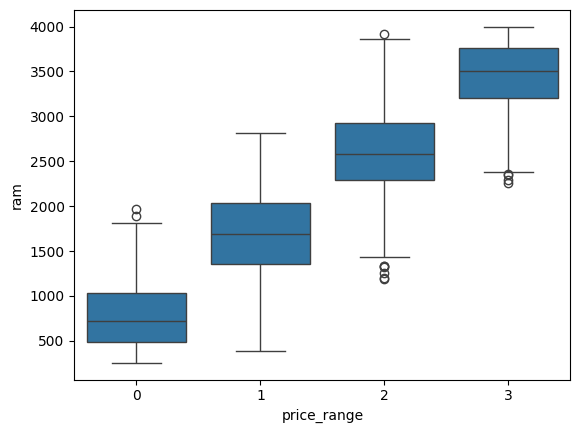

In [36]:
sns.boxplot(x='price_range' , y='ram' , data=df)

<Axes: xlabel='price_range', ylabel='ram'>

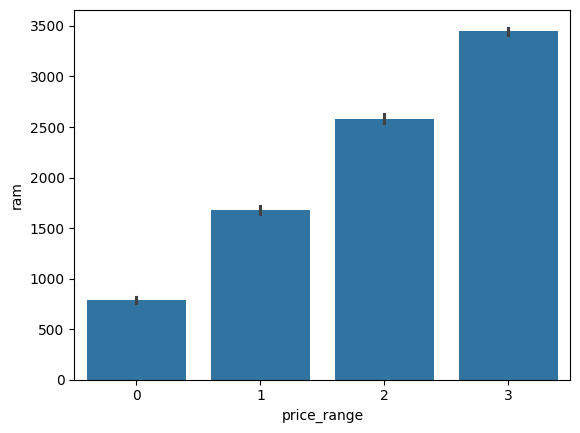

In [37]:
sns.barplot(x='price_range' , y='ram' , data=df)

<Axes: xlabel='price_range', ylabel='battery_power'>

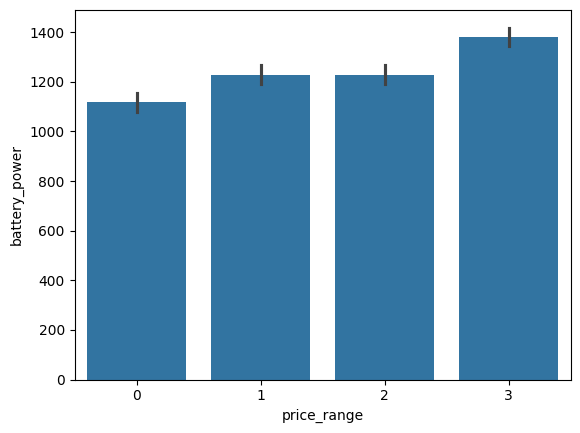

In [38]:
sns.barplot(x='price_range' , y='battery_power' , data=df)

<Axes: xlabel='price_range', ylabel='ram'>

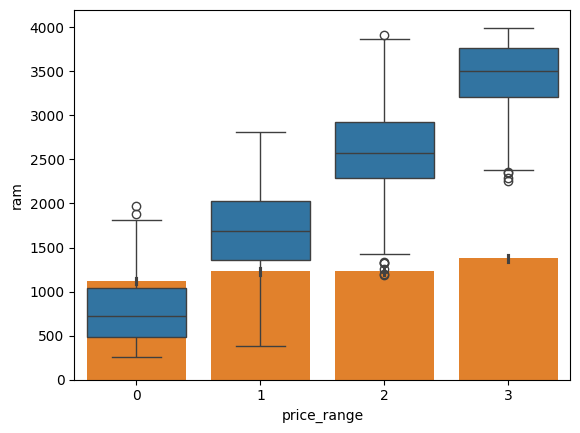

In [39]:
sns.boxplot(x='price_range' , y='ram' , data=df)
sns.barplot(x='price_range' , y='battery_power' , data=df)

<Axes: >

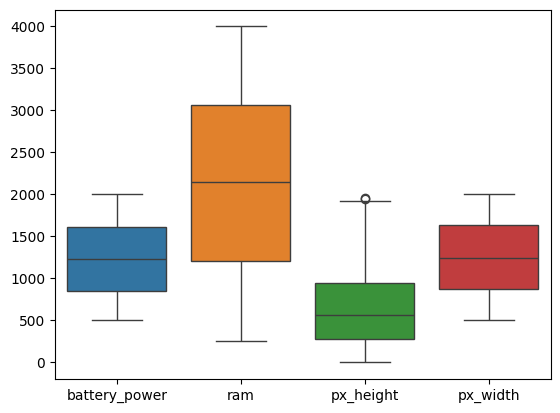

In [40]:
sns.boxplot(data=df[['battery_power', 'ram', 'px_height', 'px_width']])

In [41]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop('price_range' , axis=1))

In [42]:

from sklearn.model_selection import train_test_split

X = df.drop('price_range', axis=1)
y = df['price_range']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       105
           1       0.85      0.84      0.84        91
           2       0.79      0.84      0.81        92
           3       0.93      0.88      0.91       112

    accuracy                           0.88       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.88      0.88      0.88       400



<Axes: >

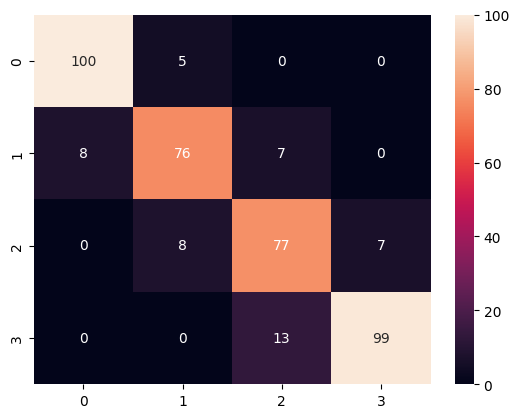

In [44]:
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d')

In [45]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred_rf)

In [46]:
accuracy

0.88

In [47]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
}
grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=3)
grid.fit(X_train, y_train)
print(grid.best_params_)


{'max_depth': 20, 'n_estimators': 200}


In [48]:
from sklearn.ensemble import RandomForestClassifier

best_model = RandomForestClassifier(n_estimators=200, max_depth=20)
best_model.fit(X_train, y_train)


RandomForestClassifier(max_depth=20, n_estimators=200)

In [53]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = best_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9025
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       105
           1       0.88      0.89      0.89        91
           2       0.83      0.85      0.84        92
           3       0.94      0.90      0.92       112

    accuracy                           0.90       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.90      0.90      0.90       400



In [54]:
sample = pd.DataFrame([{
    'battery_power': 842,
    'blue': 0,
    'clock_speed': 2.2,
    'dual_sim': 0,
    'fc': 1,
    'four_g': 0,
    'int_memory': 7,
    'm_dep': 0.6,
    'mobile_wt': 188,
    'n_cores': 2,
    'pc': 2,
    'px_height': 20,
    'px_width': 756,
    'ram': 2549,
    'sc_h': 9,
    'sc_w': 7,
    'talk_time': 19,
    'three_g': 0,
    'touch_screen': 0,
    'wifi': 1
}])

prediction = best_model.predict(sample)
price_mapping = {0: 'Low', 1: 'Medium', 2: 'High', 3: 'Very High'}
print("Predicted Price Range:", price_mapping[prediction[0]])



Predicted Price Range: Medium


In [26]:
import joblib
joblib.dump(rf, 'mobile_price_model.pkl')

['mobile_price_model.pkl']